In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

In [191]:
data = pd.read_csv("/Users/erikagromule/Desktop/Historical_data_public_sector.csv", delimiter=";")

In [192]:
print(data.dtypes)

No.                                              int64
Gender                                          object
Age                                            float64
Secundary education                             object
Graduation                                     float64
First education                                 object
Specialization of first education               object
Second education                                object
Specialization of second education              object
Third education                                 object
Specialization of third education               object
Total work experience                          float64
Experience in public administration             object
Experience in a municipal institution           object
Experience in the private sector                object
Experience in an international organization     object
Experience relevant to the job role             object
Native language                                 object
Ministry  

In [193]:
#missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   No.                                          1335 non-null   int64  
 1   Gender                                       1331 non-null   object 
 2   Age                                          796 non-null    float64
 3   Secundary education                          176 non-null    object 
 4   Graduation                                   173 non-null    float64
 5   First education                              1287 non-null   object 
 6   Specialization of first education            1220 non-null   object 
 7   Second education                             619 non-null    object 
 8   Specialization of second education           614 non-null    object 
 9   Third education                              100 non-null    object 
 10  

In [194]:
data.describe=round(data.describe(), 2)
data.describe

,No.,Age,Graduation,Total work experience,Year of publication
count,1335.00,796.00,173.00,1310.00,1335.00
mean,668.00,1982.44,2003.16,2001.28,2023.40
std,385.53,46.52,10.46,111.19,0.49
min,1.00,1075.00,1972.00,0.00,2023.00
25%,334.50,1978.00,1996.00,2001.00,2023.00
50%,668.00,1986.00,2003.00,2007.00,2023.00
75%,1001.50,1993.00,2012.00,2015.00,2024.00
max,1335.00,2010.00,2022.00,2026.00,2024.00


In [195]:
data = data.replace(1086, 1986)

In [196]:
data = data.replace(1075, 1975)

In [197]:
# Assuming your DataFrame is named data
# Convert "v" to "V" for capitalization consistency
data['Gender'] = data['Gender'].str.strip().str.upper().replace('V', 'V')

# Replace "S" with "V"
data['Gender'] = data['Gender'].str.strip().str.upper().replace('S', 'S')

# Check the updated counts to verify the changes
print(data['Gender'].value_counts())

Gender
S    984
V    347
Name: count, dtype: int64


In [198]:
# Convert 'Decision' column values to lowercase and remove leading/trailing whitespace
data['Decision'] = data['Decision'].str.lower().str.strip()

# Map similar categories to a single category
mapping = {
    'noraidīts': 'noraidīts',
    'izvēlēts': 'izvēlēts',
    'atsaucis': 'izvēlēts',  # Map 'atsaucis' to 'izvēlēts'
}

data['Decision'] = data['Decision'].map(mapping).fillna(data['Decision'])  # Fill NaN values with original values

# Check unique values in the 'Decision' column to verify the mapping
print(data['Decision'].unique())

['noraidīts' 'izvēlēts']


In [199]:
data.describe=round(data.describe(), 2)
data.describe

,No.,Age,Graduation,Total work experience,Year of publication
count,1335.00,796.00,173.00,1310.00,1335.00
mean,669.35,1984.70,2003.16,2001.28,2023.40
std,388.53,10.62,10.46,111.19,0.49
min,1.00,1941.00,1972.00,0.00,2023.00
25%,334.50,1978.00,1996.00,2001.00,2023.00
50%,668.00,1986.00,2003.00,2007.00,2023.00
75%,1001.50,1993.00,2012.00,2015.00,2024.00
max,1986.00,2010.00,2022.00,2026.00,2024.00


In [200]:
# Check the column names in the DataFrame
print(data.columns)

# Drop the column 'No' from the DataFrame if it exists
if 'No' in data.columns:
    data.drop('No', axis=1, inplace=True)
    rounded_data_describe = round(data.describe(), 2)
    print(rounded_data_describe)
else:
    print("Column 'No' does not exist in the DataFrame.")

Index(['No.', 'Gender', 'Age', 'Secundary education', 'Graduation',
       'First education', 'Specialization of first education',
       'Second education', 'Specialization of second education',
       'Third education', 'Specialization of third education',
       'Total work experience', 'Experience in public administration',
       'Experience in a municipal institution',
       'Experience in the private sector',
       'Experience in an international organization',
       'Experience relevant to the job role', 'Native language', 'Ministry',
       'The industry', 'Position group', 'Position', 'Decision',
       'Year of publication', 'Duties of the position', 'Job requirements',
       'Institutions'],
      dtype='object')
Column 'No' does not exist in the DataFrame.


In [201]:
# Drop the 'No' column from the DataFrame
data.drop('No.', axis=1, inplace=True)

#### Model training

In [202]:
# Select features and target variable
X = data.drop('Decision', axis=1) # Drop the target column from features
y = data['Decision'] # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

In [203]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Model Building
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [205]:
# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [206]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [207]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.44      0.33      0.38        60
   noraidīts       0.82      0.88      0.85       207

    accuracy                           0.76       267
   macro avg       0.63      0.61      0.61       267
weighted avg       0.74      0.76      0.74       267



In [208]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 20  40]
 [ 25 182]]


In [209]:
# Get number of observations
num_observations = data.shape[0]

# Get class distribution in the original dataset
class_distribution_original = data['Decision'].value_counts()

# Get class distribution in the training set
class_distribution_train = y_train.value_counts()
print(f"Number of Observations: {num_observations}")
print("Class Distribution in Original Dataset:")
print(class_distribution_original)
print("Class Distribution in Training Set:")
print(class_distribution_train)

Number of Observations: 1335
Class Distribution in Original Dataset:
Decision
noraidīts    1048
izvēlēts      287
Name: count, dtype: int64
Class Distribution in Training Set:
Decision
noraidīts    841
izvēlēts     227
Name: count, dtype: int64


In [210]:
# Calculate the percentage distribution by classes of decision
class_distribution_percent = data['Decision'].value_counts(normalize=True) * 100

print("Percentage Distribution by Classes of Decision:")
print(class_distribution_percent)

Percentage Distribution by Classes of Decision:
Decision
noraidīts    78.501873
izvēlēts     21.498127
Name: proportion, dtype: float64


In [211]:
# Get the number of observations in the test set
num_test_observations = X_test.shape[0]

# Get class distribution in the test set
class_distribution_test = y_test.value_counts()

print(f"Number of Observations in the Test Set: {num_test_observations}")
print("Class Distribution in Test Set:")
print(class_distribution_test)

Number of Observations in the Test Set: 267
Class Distribution in Test Set:
Decision
noraidīts    207
izvēlēts      60
Name: count, dtype: int64


In [212]:
# Calculate the percentage distribution by classes of decision
class_distribution_test = y_test.value_counts(normalize=True) * 100

print("Class Distribution in Test Set:")
print(class_distribution_test)

Class Distribution in Test Set:
Decision
noraidīts    77.52809
izvēlēts     22.47191
Name: proportion, dtype: float64


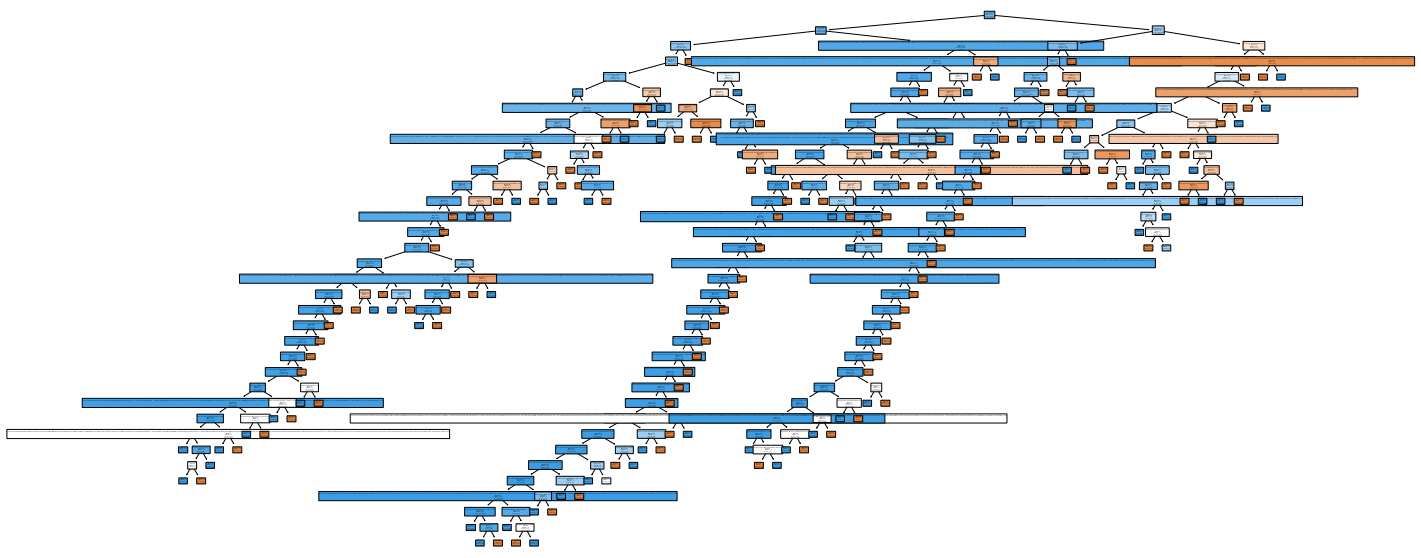

In [213]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], rounded=True)
plt.show()

In [214]:
# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature  Importance
0                                                   Age    0.121379
2                                 Total work experience    0.081298
992                                         Ministry_ZM    0.043348
1014                       The industry_Lauksaimniecība    0.029288
961               Experience relevant to the job role_3    0.020638
24                            First education_Bakalaurs    0.017008
1080                                   Position_Jurists    0.013623
1508     Institutions_State Regional Development Agency    0.013358
1503                 Institutions_Rural Support Service    0.012143
962              Experience relevant to the job role_30    0.012007
927                 Experience in the private sector_Jā    0.011877
257   Specialization of first education_Mežsaimniecī...    0.011238
1500               Institutions_National Health Service    0.011158
1502                Institu

In [215]:
# Get the feature importance for model training
feature_importance = dt_classifier.feature_importances_

# Features used for model training
features_used = X.columns[feature_importance > 0]

print("\nFeatures Used for Model Training:")
print(features_used)


Features Used for Model Training:
Index(['Age', 'Graduation', 'Total work experience',
       'Secundary education_Vispārējā vidējā izglītība',
       'First education_Bakalaurs',
       'First education_Bakalaurs (akadēmiskais grāds)',
       'First education_Maģistrs',
       'First education_Maģistrs (akadēmiskais grāds)',
       'Specialization of first education_Automatizēto vadības sistēmu specialitāte',
       'Specialization of first education_Bibliotēkzinātnē un informācijā',
       ...
       'Job requirements_Atbilstību Valsts civildienesta likuma 7.panta prasībām; Akadēmisko augstāko vai otrā līmeņa profesionālo augstāko izglītību tiesību zinātnē; Vismaz sešu mēnešu darba pieredzi jurista amatā; Vismaz sešu mēnešu darba pieredzi tiesību aktu un/vai citu juridisko dokumentu sagatavošanā; Teicamas latviešu valodas zināšanas un labas angļu valodas zināšanas; Prasmi strādāt ar liela apjoma informāciju, prasmi analizēt, klasificēt un apkopot to;\nVēlamu darba pieredzi publiskaj

In [216]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.70037453 0.66292135 0.74157303 0.57303371 0.76029963]
Mean CV Score: 0.6876404494382022


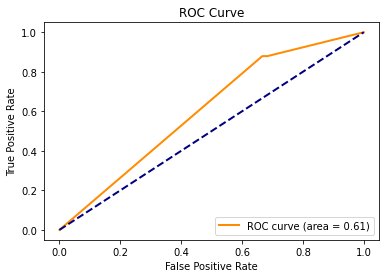

AUC Score: 0.6052737520128824


In [217]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Get predicted probabilities for the positive class
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

In [218]:
import pandas as pd

# Sample function for anonymizing categorical features
def anonymize_categorical(data, feature_name):
    # Define anonymization logic for categorical features
    anonymized_data = data[feature_name].apply(lambda x: f'Category_{hash(x) % 1000}')
    return anonymized_data

# Choose a categorical feature to anonymize
feature_to_anonymize = 'Gender'  # Example feature name

# Anonymize the chosen categorical feature
data[feature_to_anonymize + '_anonymized'] = anonymize_categorical(data, feature_to_anonymize)

# Display the anonymized dataset
print(data.head())

  Gender  Age Secundary education  Graduation First education  \
0      S  NaN                 NaN         NaN       Bakalaurs   
1      V  NaN                 NaN         NaN       Bakalaurs   
2      S  NaN                 NaN         NaN       Bakalaurs   
3      S  NaN                 NaN         NaN        Maģistrs   
4      S  NaN                 NaN         NaN       Bakalaurs   

  Specialization of first education                 Second education  \
0                    Personālvadība                              NaN   
1                  Tiesību zinātnēs                              NaN   
2           Uzņēmējdarbības vadība   Maģistrs (profesionālais grāds)   
3         Izglītības zinātņu vadība                        Maģistrs    
4                  Tiesību zinātnēs                         Maģistrs   

  Specialization of second education                  Third education  \
0                                NaN                              NaN   
1                             

In [219]:
print(X_test.columns)

Index(['Age', 'Graduation', 'Total work experience', 'Year of publication',
       'Gender_V', 'Secundary education_2020',
       'Secundary education_Arodvidusskola', 'Secundary education_Koledža',
       'Secundary education_Profesionālā vidējā',
       'Secundary education_Profesionālā vidējā izglītība',
       ...
       'Institutions_Rural Support Service',
       'Institutions_State Employment Agency',
       'Institutions_State Forest Service', 'Institutions_State Land Service',
       'Institutions_State Probation Service',
       'Institutions_State Regional Development Agency',
       'Institutions_State Revenue Service',
       'Institutions_State Social Insurance Agency',
       'Institutions_State Technical Supervision Agency',
       'Institutions_State Treasury'],
      dtype='object', length=1513)


In [220]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [221]:
from sklearn.metrics import accuracy_score

# Retrain the Decision Tree model with the best parameters
dt_classifier_optimized = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
dt_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set with optimized parameters: {accuracy}")

Accuracy on the test set with optimized parameters: 0.7902621722846442


In [222]:
from sklearn.metrics import classification_report

# Generate classification report for the optimized Decision Tree model
classification_rep = classification_report(y_test, y_pred)

print("Classification Report for the optimized Decision Tree model:")
print(classification_rep)

Classification Report for the optimized Decision Tree model:
              precision    recall  f1-score   support

    izvēlēts       0.83      0.08      0.15        60
   noraidīts       0.79      1.00      0.88       207

    accuracy                           0.79       267
   macro avg       0.81      0.54      0.52       267
weighted avg       0.80      0.79      0.72       267



#### Model training without age

In [223]:
# Select features (excluding 'Age') and target variable
X = data.drop(['Decision', 'Age'], axis=1)  # Drop 'Age' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

In [224]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [225]:
# Model Building
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [226]:
# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [227]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [228]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.37      0.30      0.33        60
   noraidīts       0.81      0.85      0.83       207

    accuracy                           0.73       267
   macro avg       0.59      0.58      0.58       267
weighted avg       0.71      0.73      0.72       267



In [229]:
# Get number of observations
num_observations = data.shape[0]

# Get class distribution in the original dataset
class_distribution_original = data['Decision'].value_counts()

# Get class distribution in the training set
class_distribution_train = y_train.value_counts()
print(f"Number of Observations: {num_observations}")
print("Class Distribution in Original Dataset:")
print(class_distribution_original)
print("Class Distribution in Training Set:")
print(class_distribution_train)

Number of Observations: 1335
Class Distribution in Original Dataset:
Decision
noraidīts    1048
izvēlēts      287
Name: count, dtype: int64
Class Distribution in Training Set:
Decision
noraidīts    841
izvēlēts     227
Name: count, dtype: int64


In [230]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 18  42]
 [ 31 176]]


In [231]:
# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature  Importance
1                                 Total work experience    0.086811
1489           Institutions_Food and Veterinary Service    0.023122
23                            First education_Bakalaurs    0.018580
1507     Institutions_State Regional Development Agency    0.018208
926                 Experience in the private sector_Jā    0.017430
913              Experience in public administration_Jā    0.016893
960               Experience relevant to the job role_3    0.016578
1081                                  Position_Mežzinis    0.015177
1109                            Position_Ārsts eksperts    0.015054
1082                     Position_Nodarbinātības aģents    0.014718
527                           Second education_Maģistrs    0.013613
1486     Institutions_Consumer Rights Protection Centre    0.013494
928                 Experience in the private sector_Nē    0.012151
971               Experienc

In [232]:
# Get the feature importance for model training
feature_importance = dt_classifier.feature_importances_

# Features used for model training
features_used = X.columns[feature_importance > 0]

print("\nFeatures Used for Model Training:")
print(features_used)


Features Used for Model Training:
Index(['Graduation', 'Total work experience', 'Year of publication',
       'Gender_V', 'Secundary education_Vispārējā vidējā izglītība',
       'First education_Bakalaurs',
       'First education_Bakalaurs (akadēmiskais grāds)',
       'First education_Bakalaurs (profesionālais grāds)',
       'First education_Bakalaurs (profesioālais grāds)',
       'First education_Koledžas izglītība',
       ...
       'Job requirements_Zināšanas informācijas sistēmu analīzes un/vai izmaiņu ieviešanas jomā, vēlamas iemaņas testēšanā un programmatūras tehniskās dokumentācijas izstrādē; Par priekšrocību tiks uzskatītas zināšanas vai iemaņas finanšu informācijas sistēmās, izpratne par grāmatvedības uzskaites principiem; Par priekšrocību tiks uzskatītas zināšanas, darba pieredze vai pārbaudāmas iemaņas darbā ar relāciju datu bāzēm un SQL; Par priekšrocību tiks uzskatītas zināšanas, darba pieredze vai pārbaudāmas iemaņas darbā ar BI (BusinessIntelligence) tehnoloģijām

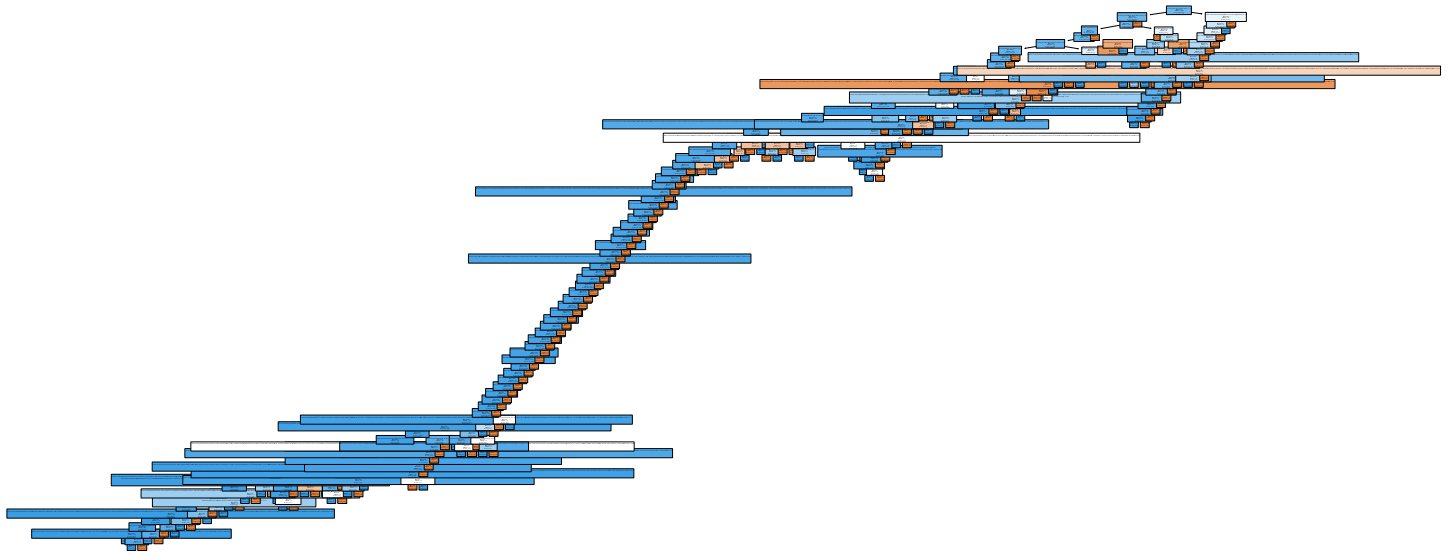

In [233]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], rounded=True)
plt.show()

In [234]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.74531835 0.5917603  0.41573034 0.50561798 0.73782772]
Mean CV Score: 0.599250936329588


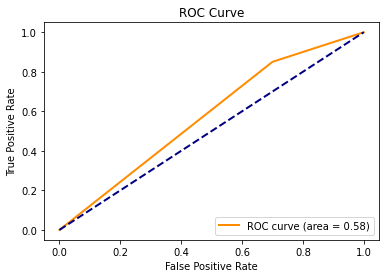

AUC Score: 0.5751207729468599


In [235]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Get predicted probabilities for the positive class
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

#### Model training without age and gender

In [236]:
# Select features (excluding 'Age' and 'Gender') and target variable
X = data.drop(['Decision', 'Age', 'Gender'], axis=1)  # Drop 'Age'  and 'Gender' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

In [237]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
# Model Building
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [239]:
# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [240]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [241]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.38      0.32      0.35        60
   noraidīts       0.81      0.85      0.83       207

    accuracy                           0.73       267
   macro avg       0.60      0.58      0.59       267
weighted avg       0.71      0.73      0.72       267



In [242]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 19  41]
 [ 31 176]]


In [243]:
# Get number of observations
num_observations = data.shape[0]

# Get class distribution in the original dataset
class_distribution_original = data['Decision'].value_counts()

# Get class distribution in the training set
class_distribution_train = y_train.value_counts()
print(f"Number of Observations: {num_observations}")
print("Class Distribution in Original Dataset:")
print(class_distribution_original)
print("Class Distribution in Training Set:")
print(class_distribution_train)

Number of Observations: 1335
Class Distribution in Original Dataset:
Decision
noraidīts    1048
izvēlēts      287
Name: count, dtype: int64
Class Distribution in Training Set:
Decision
noraidīts    841
izvēlēts     227
Name: count, dtype: int64


In [244]:
# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature  Importance
1                                 Total work experience    0.092276
1488           Institutions_Food and Veterinary Service    0.023122
1506     Institutions_State Regional Development Agency    0.018208
959               Experience relevant to the job role_3    0.017414
925                 Experience in the private sector_Jā    0.016441
912              Experience in public administration_Jā    0.016236
1080                                  Position_Mežzinis    0.015177
1292  Job requirements_Akadēmiskā vai otrā līmeņa au...    0.015054
22                            First education_Bakalaurs    0.014826
1232  Duties of the position_Sniegt pakalpojumus bez...    0.014718
526                           Second education_Maģistrs    0.013613
1485     Institutions_Consumer Rights Protection Centre    0.013494
921            Experience in a municipal institution_Nē    0.012522
970               Experienc

In [245]:
# Get the feature importance for model training
feature_importance = dt_classifier.feature_importances_

# Features used for model training
features_used = X.columns[feature_importance > 0]

print("\nFeatures Used for Model Training:")
print(features_used)


Features Used for Model Training:
Index(['Graduation', 'Total work experience',
       'Secundary education_Vispārējā vidējā izglītība',
       'First education_Bakalarus', 'First education_Bakalaurs',
       'First education_Bakalaurs (akadēmiskais grāds)',
       'First education_Bakalaurs (profesionālais grāds)',
       'First education_Koledžas izglītība', 'First education_Maģistrs',
       'First education_Maģistrs ',
       ...
       'Institutions_Enterprise Register',
       'Institutions_Food and Veterinary Service',
       'Institutions_Health Inspectorate',
       'Institutions_Ministry of Agriculture',
       'Institutions_Ministry of Environmental Protection and Regional Development',
       'Institutions_National Health Service',
       'Institutions_Procurement Monitoring Bureau',
       'Institutions_Provision State Agency',
       'Institutions_State Regional Development Agency',
       'Gender_anonymized_Category_231'],
      dtype='object', length=160)


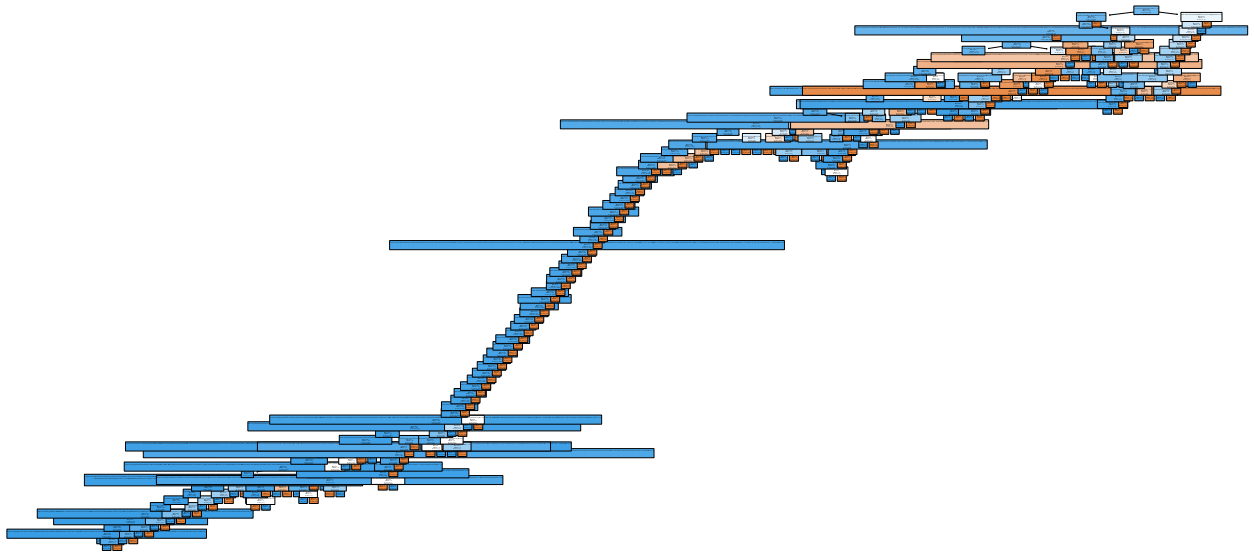

In [246]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], rounded=True)
plt.show()

In [247]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.72284644 0.58426966 0.41947566 0.51685393 0.73033708]
Mean CV Score: 0.594756554307116


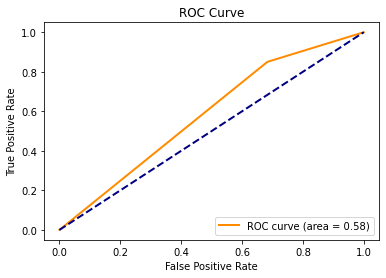

AUC Score: 0.5834541062801932


In [248]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Get predicted probabilities for the positive class
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

#### Modeling without gender

In [351]:
# Select features (excluding 'Gender') and target variable
X = data.drop(['Decision', 'Gender'], axis=1)  # Drop 'Gender' along with the target column from features
y = data['Decision']  # Target variable

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(X.mean())

In [352]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [353]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [354]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [355]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [356]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.49      0.38      0.43        60
   noraidīts       0.83      0.88      0.86       207

    accuracy                           0.77       267
   macro avg       0.66      0.63      0.64       267
weighted avg       0.75      0.77      0.76       267



In [357]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[ 23  37]
 [ 24 183]]


In [358]:
# Get number of observations
num_observations = data.shape[0]

# Get class distribution in the original dataset
class_distribution_original = data['Decision'].value_counts()

# Get class distribution in the training set
class_distribution_train = y_train.value_counts()
print(f"Number of Observations: {num_observations}")
print("Class Distribution in Original Dataset:")
print(class_distribution_original)
print("Class Distribution in Training Set:")
print(class_distribution_train)

Number of Observations: 1335
Class Distribution in Original Dataset:
Decision
noraidīts    1048
izvēlēts      287
Name: count, dtype: int64
Class Distribution in Training Set:
Decision
noraidīts    841
izvēlēts     227
Name: count, dtype: int64


In [360]:
# Get feature importances from the trained Decision Tree Classifier
feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importances_df)

Feature Importances:
                                                Feature  Importance
0                                                   Age    0.115487
2                                 Total work experience    0.074014
991                                         Ministry_ZM    0.043348
1013                       The industry_Lauksaimniecība    0.029288
960               Experience relevant to the job role_3    0.020638
23                            First education_Bakalaurs    0.019824
1082                     Position_Nodarbinātības aģents    0.018145
1507     Institutions_State Regional Development Agency    0.018042
928                 Experience in the private sector_Nē    0.013676
1079                                   Position_Jurists    0.013623
1502                 Institutions_Rural Support Service    0.012143
961              Experience relevant to the job role_30    0.012007
949               Experience relevant to the job role_2    0.011731
256   Specialization of fir

In [361]:
# Get the feature importance for model training
feature_importance = dt_classifier.feature_importances_

# Features used for model training
features_used = X.columns[feature_importance > 0]

print("\nFeatures Used for Model Training:")
print(features_used)


Features Used for Model Training:
Index(['Age', 'Total work experience', 'First education_Bakalarus',
       'First education_Bakalaurs', 'First education_Bakalaurs ',
       'First education_Bakalaurs (akadēmiskais grāds)',
       'First education_Maģistrs (akadēmiskais grāds)',
       'Specialization of first education_Angļu filoloģija',
       'Specialization of first education_Bibliotēkzinātnē un informācijā',
       'Specialization of first education_Biznesa vadībā',
       ...
       'Job requirements_Nozarei atbilstoša akadēmiskā vai otrā līmeņa profesionālā augstākā izglītība; Vismaz 1 gada praktiskā darba pieredze datu apstrādē un analīzē; Vēlama praktiskā darba pieredze ar lielām datu bāzēm; Zināšanas datu ieguves, apstrādes un analīzes metožu pielietošanā; Datu kvalitātes novērtēšanas prasmes; Labas zināšanas Microsoft datorprogrammās (Access, Word, Excel, PowerPoint) un tīmekļa pārlūkprogrammās; Angļu valodas zināšanas B līmenī; Ļoti labas sadarbības un komunikācijas prasm

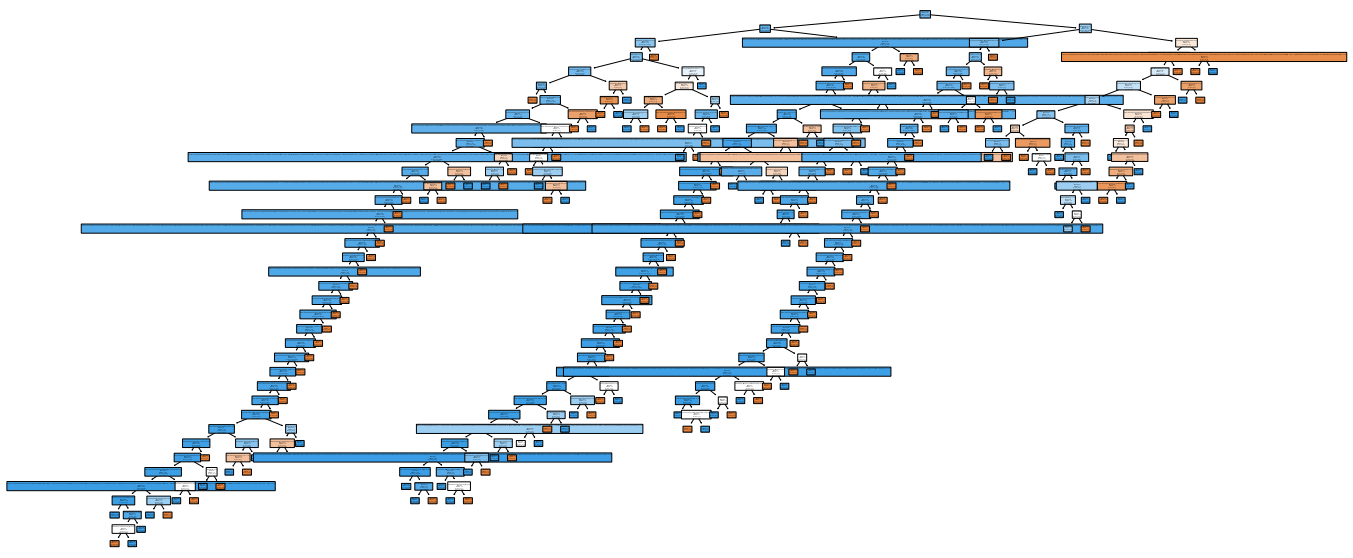

In [362]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['noraidīts', 'izvēlēts'], 
               rounded=True)
plt.show()

In [363]:
# Get the number of nodes and leaves in the Decision Tree
n_nodes = dt_classifier.tree_.node_count
n_leaves = dt_classifier.get_n_leaves()

print("Number of nodes in the Decision Tree:", n_nodes)
print("Number of leaves in the Decision Tree:", n_leaves)

# Get feature importances
feature_importances = dt_classifier.feature_importances_
print("Feature importances:", feature_importances)

Number of nodes in the Decision Tree: 377
Number of leaves in the Decision Tree: 189
Feature importances: [0.11548686 0.         0.07401404 ... 0.         0.00422332 0.        ]


In [337]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.71535581 0.68539326 0.71910112 0.60674157 0.76404494]
Mean CV Score: 0.6981273408239701


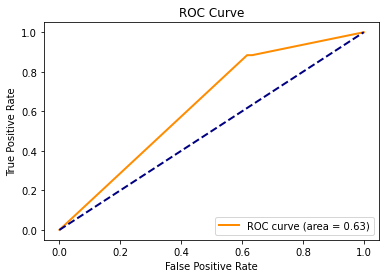

AUC Score: 0.6327294685990339


In [338]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Map categorical labels to binary: 'izvēlēts' to 0, 'noraidīts' to 1
y_test_binary = np.where(y_test == 'izvēlēts', 0, 1)

# Get predicted probabilities for the positive class
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)

In [339]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
average_type = 'weighted'  # Choose 'micro', 'macro', or 'weighted' based on your preference
precision = precision_score(y_test, y_pred, average=average_type)
recall = recall_score(y_test, y_pred, average=average_type)
f1 = f1_score(y_test, y_pred, average=average_type)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7548616695281769
Recall: 0.7715355805243446
F1 Score: 0.7611346964491981


In [368]:
# Define age groups and corresponding labels
age_groups = ['18-20', '21-30', '31-40', '41-50', '51-60', '61+']
group_labels = np.random.choice(age_groups, size=100)

# Predictions for DT models for each data point
prediction_DT = np.random.randint(0, 2, size=100)

# Define predictions for different age groups for DT models
group_predictions_DT = {}
for group in age_groups:
    group_predictions_DT[group] = prediction_DT[group_labels == group]

for group in age_groups:
    print(f"Age Group: {group}")
    print(f"Mean Prediction DT: {np.mean(group_predictions_DT[group])}")
    print("\n")

Age Group: 18-20
Mean Prediction DT: 0.3333333333333333


Age Group: 21-30
Mean Prediction DT: 0.5833333333333334


Age Group: 31-40
Mean Prediction DT: 0.46153846153846156


Age Group: 41-50
Mean Prediction DT: 0.391304347826087


Age Group: 51-60
Mean Prediction DT: 0.2222222222222222


Age Group: 61+
Mean Prediction DT: 0.42105263157894735




In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Initialize Decision Tree (DT) classifier
dt_classifier = DecisionTreeClassifier()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a voting classifier with DT for model averaging
voting_classifier_dt = VotingClassifier(estimators=[('dt', dt_classifier)], voting='soft')

# Train the voting classifier on the data
voting_classifier_dt.fit(X_train, y_train)

# Assess the performance of the voting classifier with DT
accuracy_dt = voting_classifier_dt.score(X_test, y_test)
print("Accuracy of the Voting Classifier with Decision Tree:", accuracy_dt)

Accuracy of the Voting Classifier with Decision Tree: 0.7827715355805244


In [341]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

# Initialize Decision Tree (DT) and Random Forest (RF) classifiers
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()

# Create a stacking classifier with Decision Tree as base estimator
stacking_classifier_dt = StackingClassifier(estimators=[('dt', dt_classifier)], final_estimator=rf_classifier)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the stacking classifier with DT as the base estimator
stacking_classifier_dt.fit(X_train, y_train)

# Assess the performance of the stacking classifier with DT
accuracy_stacking_dt = stacking_classifier_dt.score(X_test, y_test)
print("Accuracy of the Stacking Classifier with Decision Tree:", accuracy_stacking_dt)

Accuracy of the Stacking Classifier with Decision Tree: 0.7752808988764045


In [347]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [349]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree Classifier with the best parameters from GridSearchCV
dt_classifier_optimized = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=10, 
                                                 random_state=42)

# Fit the optimized Decision Tree model on the training data
dt_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy on the test set with optimized Decision Tree parameters: {accuracy_dt}")

# Generate and print a classification report for the Decision Tree model
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy on the test set with optimized Decision Tree parameters: 0.7902621722846442
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.83      0.08      0.15        60
   noraidīts       0.79      1.00      0.88       207

    accuracy                           0.79       267
   macro avg       0.81      0.54      0.52       267
weighted avg       0.80      0.79      0.72       267

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2; total ti

In [348]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Decision Tree Classifier with the best parameters from GridSearchCV
dt_classifier_optimized = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=10, 
                                                 random_state=42)

# Fit the optimized Decision Tree model on the training data
dt_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy on the test set with optimized Decision Tree parameters: {accuracy_dt}")

# Generate and print a classification report for the Decision Tree model
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy on the test set with optimized Decision Tree parameters: 0.7902621722846442
Classification Report:
              precision    recall  f1-score   support

    izvēlēts       0.83      0.08      0.15        60
   noraidīts       0.79      1.00      0.88       207

    accuracy                           0.79       267
   macro avg       0.81      0.54      0.52       267
weighted avg       0.80      0.79      0.72       267



In [346]:
from sklearn.metrics import accuracy_score

# Retrain the Decision Tree model with the best parameters
dt_classifier_optimized = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
dt_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set with optimized parameters: {accuracy}")

Accuracy on the test set with optimized parameters: 0.7902621722846442
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=10; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=4, min_samples_split=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10; total time=   0.2s
[CV] END max_depth=5, 

In [367]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

# Instantiate RandomOverSampler to balance the classes
oversampler = RandomOverSampler(random_state=42)

# Resample the dataset to balance the classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate model performance using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set with the Decision Tree model: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc)

Accuracy on the test set with the Decision Tree model: 0.888095238095238
[[211  10]
 [ 37 162]]
AUC Score: 0.6327294685990339


In [323]:
from sklearn.metrics import classification_report

# Generate a classification report for the Decision Tree model
classification_rep_dt = classification_report(y_test, y_pred)

print("Classification Report for the Decision Tree model:")
print(classification_rep_dt)

Classification Report for the Decision Tree model:
              precision    recall  f1-score   support

    izvēlēts       0.85      0.95      0.90       221
   noraidīts       0.94      0.81      0.87       199

    accuracy                           0.89       420
   macro avg       0.90      0.88      0.89       420
weighted avg       0.89      0.89      0.89       420



In [35]:
import pandas as pd

# Sample function for anonymizing categorical features
def anonymize_categorical(data, feature_name):
    # Define anonymization logic for categorical features
    anonymized_data = data[feature_name].apply(lambda x: f'Category_{hash(x) % 1000}')
    return anonymized_data

# Choose a categorical feature to anonymize
feature_to_anonymize = 'Gender'  # Example feature name

# Anonymize the chosen categorical feature
data[feature_to_anonymize + '_anonymized'] = anonymize_categorical(data, feature_to_anonymize)

# Display the anonymized dataset
print(data.head())

  Gender  Age Secundary education  Graduation First education  \
0      S  NaN                 NaN         NaN       Bakalaurs   
1      V  NaN                 NaN         NaN       Bakalaurs   
2      S  NaN                 NaN         NaN       Bakalaurs   
3      S  NaN                 NaN         NaN        Maģistrs   
4      S  NaN                 NaN         NaN       Bakalaurs   

  Specialization of first education                 Second education  \
0                    Personālvadība                              NaN   
1                  Tiesību zinātnēs                              NaN   
2           Uzņēmējdarbības vadība   Maģistrs (profesionālais grāds)   
3         Izglītības zinātņu vadība                        Maģistrs    
4                  Tiesību zinātnēs                         Maģistrs   

  Specialization of second education                  Third education  \
0                                NaN                              NaN   
1                             

In [36]:
print(X_test.columns)

Index(['Age', 'Graduation', 'Total work experience', 'Year of publication',
       'Gender_V', 'Secundary education_2020',
       'Secundary education_Arodvidusskola', 'Secundary education_Koledža',
       'Secundary education_Profesionālā vidējā',
       'Secundary education_Profesionālā vidējā izglītība',
       ...
       'Institutions_Rural Support Service',
       'Institutions_State Employment Agency',
       'Institutions_State Forest Service', 'Institutions_State Land Service',
       'Institutions_State Probation Service',
       'Institutions_State Regional Development Agency',
       'Institutions_State Revenue Service',
       'Institutions_State Social Insurance Agency',
       'Institutions_State Technical Supervision Agency',
       'Institutions_State Treasury'],
      dtype='object', length=1513)


In [37]:
# Measure and mitigate biases in the dataset and model predictions
from fairlearn.metrics import selection_rate
y_pred = dt_classifier.predict(X_test)
y_true = y_test 
# Define sensitive features (example: 'Gender')
sensitive_features = X_test['Gender']
# Calculate selection rates
selection_rates = selection_rate(y_true, y_pred, sensitive_features=sensitive_features)

KeyError: 'Gender'

In [ ]:
# Utilize model explainability techniques for interpretability
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

#### The Grid Search

In [555]:
from sklearn.model_selection import GridSearchCV

In [556]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [557]:
from sklearn.metrics import accuracy_score

# Retrain the Decision Tree model with the best parameters
dt_classifier_optimized = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, random_state=42)
dt_classifier_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier_optimized.predict(X_test)

# Calculate accuracy score on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on the test set with optimized parameters: {accuracy}")

Accuracy on the test set with optimized parameters: 0.7865168539325843


In [558]:
from sklearn.metrics import classification_report

# Generate classification report for the optimized Decision Tree model
classification_rep = classification_report(y_test, y_pred)

print("Classification Report for the optimized Decision Tree model:")
print(classification_rep)

Classification Report for the optimized Decision Tree model:
              precision    recall  f1-score   support

    izvēlēts       0.71      0.08      0.15        60
   noraidīts       0.79      0.99      0.88       207

    accuracy                           0.79       267
   macro avg       0.75      0.54      0.51       267
weighted avg       0.77      0.79      0.71       267



#### Balancing classes

In [559]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [560]:
from imblearn.over_sampling import RandomOverSampler

# Create the resampling object
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transformation
X_resampled, y_resampled = oversample.fit_resample(X, y)

In [561]:
# Count and calculate percentage distribution in the resampled dataset
value_counts_resampled = pd.Series(y_resampled).value_counts()
percentage_distribution_resampled = pd.Series(y_resampled).value_counts(normalize=True) * 100

print("Number of Observations in Resampled Groups:")
print(value_counts_resampled)
print("\nPercentage Distribution in Resampled Groups:")
print(percentage_distribution_resampled)

Number of Observations in Resampled Groups:
Decision
noraidīts    1048
izvēlēts     1048
Name: count, dtype: int64

Percentage Distribution in Resampled Groups:
Decision
noraidīts    50.0
izvēlēts     50.0
Name: proportion, dtype: float64


In [562]:
from imblearn.under_sampling import RandomUnderSampler

# Create the resampling object
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the transformation
X_resampled, y_resampled = undersample.fit_resample(X, y)

In [563]:
import pandas as pd

# Count and calculate percentage distribution in the resampled dataset
value_counts_resampled = resampled_df['Decision'].value_counts()
percentage_distribution_resampled = resampled_df['Decision'].value_counts(normalize=True) * 100

print("\nNumber of Observations in Resampled Groups:")
print(value_counts_resampled)
print("\nPercentage Distribution in Resampled Groups:")
print(percentage_distribution_resampled)


Number of Observations in Resampled Groups:
Decision
izvēlēts     287
noraidīts    287
Name: count, dtype: int64

Percentage Distribution in Resampled Groups:
Decision
izvēlēts     50.0
noraidīts    50.0
Name: proportion, dtype: float64


In [347]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier_undersampled = DecisionTreeClassifier(random_state=42)

# Fit the model on the undersampled data
dt_classifier_undersampled.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred_undersampled = dt_classifier_undersampled.predict(X_test)

In [348]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the resampling object
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fit and apply the transformation
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_undersampled = DecisionTreeClassifier(random_state=42)

# Fit the model on the undersampled data
dt_classifier_undersampled.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_undersampled = dt_classifier_undersampled.predict(X_test)

# Calculate accuracy on the test set
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)

print(f"Accuracy on the Test Set after Undersampling: {accuracy_undersampled}")

Accuracy on the Test Set after Undersampling: 0.6869565217391305


In [568]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate additional metrics after training the Decision Tree model and making predictions
precision_undersampled = precision_score(y_test, y_pred_undersampled, average='weighted', labels=np.unique(y_pred_undersampled))
recall_undersampled = recall_score(y_test, y_pred_undersampled, average='weighted', labels=np.unique(y_pred_undersampled))
f1_undersampled = f1_score(y_test, y_pred_undersampled, average='weighted', labels=np.unique(y_pred_undersampled))
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)

print(f"Precision on the Test Set after Oversampling: {precision_undersampled}")
print(f"Recall on the Test Set after Oversampling: {recall_undersampled}")
print(f"F1 Score on the Test Set after Oversampling: {f1_undersampled}")
print("Confusion Matrix after Oversampling:")
print(conf_matrix_undersampled)

Precision on the Test Set after Oversampling: 0.6859293915194536
Recall on the Test Set after Oversampling: 0.6869565217391305
F1 Score on the Test Set after Oversampling: 0.6862341137123745
Confusion Matrix after Oversampling:
[[47 17]
 [19 32]]


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_undersampled = DecisionTreeClassifier(random_state=42)

# Fit the model on the undersampled data
dt_classifier_undersampled.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_undersampled = dt_classifier_undersampled.predict(X_test)

In [349]:
from imblearn.over_sampling import RandomOverSampler

# Create the resampling object
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transformation
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier_resampled = DecisionTreeClassifier(random_state=42)

# Fit the model on the resampled data
dt_classifier_resampled.fit(X_train, y_train)

# Make predictions on the original test set
y_pred_resampled = dt_classifier_resampled.predict(X_test)

# Calculate accuracy on the test set
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)

print(f"Accuracy on the Test Set after Oversampling: {accuracy_resampled}")

Accuracy on the Test Set after Oversampling: 0.8738095238095238
